# Example: Repeated Bertrand Game

This notebook provides example code to make it easier to write a player function. 

* Write player functions, `player1.py`, `player2.py`, ... in the folder `./players/`. 
* Run this notebook: it will automatically read them all.

In [1]:
from game_tournament.game import RepeatedBertrandGame, Tournament
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

%load_ext autoreload
%autoreload 2 

# Reading in player modules 

In [2]:
# later, we will give the path directly to a function
player_path = './examples/players_repeated/'

# General setup, common across specifications 

* **Marginal cost:** $c = 0.5$ 
* **Action space:** $p \in [c; 10]$

In [3]:
c = 0.5
pmin = c
pmax = 10.

### Demand curve
$$ D_i(p_i, p_j) = \frac{\exp(1-p_i)}{1 + \exp(1-p_i) + \exp(1 - p_j)} $$

In [4]:
def demand_function(p1, p2): 
    '''
    Args
        p1,p2: prices 
    Returns: 
        demand to firm 1
    '''
    u1 = np.exp(1.-1.0*p1)
    u2 = np.exp(1.-1.0*p2)
    u0 = 1.0 
    
    denom = u0 + u1 + u2
    return u1 / denom 
    

# Running a single game

We start by directly importing two specific player functions and setting them up to compete against one another. 

In [5]:
# Direct import statements 
from examples.players_repeated.player3 import player as player1
from examples.players_repeated.player2 import player as player2
print(f'Player 1: {player1.name}')
print(f'Player 2: {player2.name}')

Player 1: Undercutting Bastard
Player 2: Tit-for-tatter


In [6]:
# initialize instances of two player functions
p1 = player1()
p2 = player2()

# define the game 
price_range = (0.0, 5.0)
marginal_cost = 1.0
beta = 0.99
G = RepeatedBertrandGame(p1, p2, demand_function, marginal_cost, price_range, beta)
print(G)

Undercutting Bastard vs. Tit-for-tatter: played 0 rounds


The history of the game is empty since no rounds have been played: 

In [7]:
G.history

array([], shape=(0, 2), dtype=float64)

Now let us play `T = 100` rounds of the game. 

In [8]:
G.play_game(T=10)

In [9]:
print(G)

Undercutting Bastard vs. Tit-for-tatter: played 10 rounds


In [10]:
# Now the history property has been populated
G.history

array([[4.995  , 5.     ],
       [4.995  , 5.     ],
       [4.5    , 4.995  ],
       [4.5    , 4.995  ],
       [4.4955 , 4.5    ],
       [4.4955 , 4.5    ],
       [4.05   , 4.4955 ],
       [4.05   , 4.4955 ],
       [4.04595, 4.05   ],
       [4.04595, 4.05   ]])

In [11]:
# we can use this function to print a nice table (a pandas dataframe is returned)
tab = G.get_game_actions_and_payoffs()
tab 

actions                             payoffs               
      Undercutting Bastard Tit-for-tatter Undercutting Bastard Tit-for-tatter
Round                                                                        
0                  4.99500         5.0000             0.070933       0.070667
1                  4.99500         5.0000             0.070933       0.070667
2                  4.50000         4.9950             0.100792       0.070129
3                  4.50000         4.9950             0.100792       0.070129
4                  4.49550         4.5000             0.099979       0.099658
5                  4.49550         4.5000             0.099979       0.099658
6                  4.05000         4.4955             0.134031       0.098387
7                  4.05000         4.4955             0.134031       0.098387
8                  4.04595         4.0500             0.132283       0.131924
9                  4.04595         4.0500             0.132283       0.131924

Using this dataframe, we can plot the actions and payoffs of the two players over the course of the game 

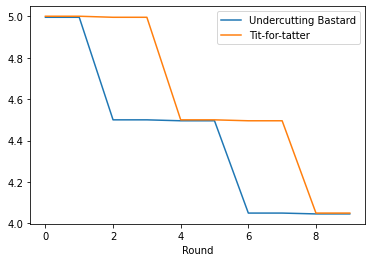

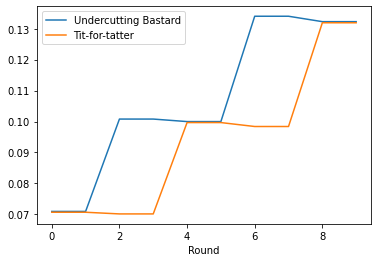

In [12]:
tab['actions'].plot(); 
tab['payoffs'].plot(); 

# Running a Tournament

This will run a full tournament between all the player functions found in the folder `player_path`. 

In [13]:
T = 100
game_data = {'demand_function':demand_function, 'discount_factor': beta, 
    'marginal_cost': c, 'price_range': (pmin,pmax)
}
t = Tournament(player_path, RepeatedBertrandGame, game_data=game_data, T=T, tournament_name='RBG', )
t.run() # run the tournament and score the game 

15it [00:00, 328.80it/s]

Tournament winner was: Randawg (against 5 opponents)


,RBG
Player,
Randawg,0.074174
Undercutting Bastard,0.049584
Anders,0.043274
Tit-for-tatter,0.040448
PMAX,0.000635
pmin,0.000000


In [14]:
matchup_results = t.get_matchup_results()
matchup_results

Opponent,pmin,Randawg,PMAX,Undercutting Bastard,Anders,Tit-for-tatter
Player,,,,,,
pmin,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
Randawg,0.038279,NaN,0.089968,0.088231,0.070374,0.084017
PMAX,0.000281,0.000668,NaN,0.000743,0.000743,0.000743
Undercutting Bastard,0.000281,0.073338,0.001774,NaN,0.094352,0.078178
Anders,0.000014,0.070416,0.001161,0.094739,NaN,0.050040
Tit-for-tatter,0.000009,0.080199,0.000743,0.074797,0.046490,NaN


Print the matchup results to see if there is a pattern in who is good against whom. 

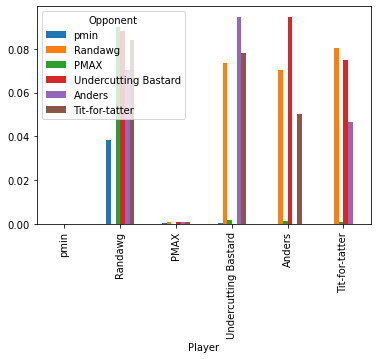

In [15]:
matchup_results.plot.bar(); 

# Access individual games

It can be useful to access individual games from the tournament to check performance. To do so, note that `t.games[:]` is the list of the games that were played. Each of these have the same printing and plotting functions as a simple game has.  

In [16]:
print(f'Available games in tournament:')
for i,g in enumerate(t.games): 
    print(f'{i}: {g.name}')

Available games in tournament:
0: pmin vs. Randawg
1: pmin vs. PMAX
2: pmin vs. Undercutting Bastard
3: pmin vs. Anders
4: pmin vs. Tit-for-tatter
5: Randawg vs. PMAX
6: Randawg vs. Undercutting Bastard
7: Randawg vs. Anders
8: Randawg vs. Tit-for-tatter
9: PMAX vs. Undercutting Bastard
10: PMAX vs. Anders
11: PMAX vs. Tit-for-tatter
12: Undercutting Bastard vs. Anders
13: Undercutting Bastard vs. Tit-for-tatter
14: Anders vs. Tit-for-tatter


Showing game history for Undercutting Bastard vs. Tit-for-tatter


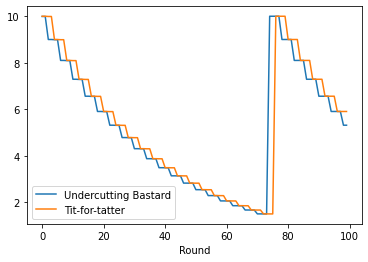

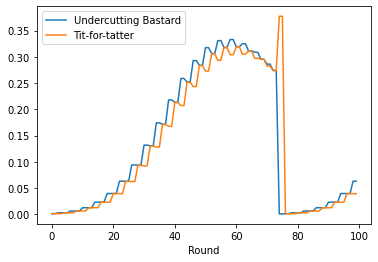

In [17]:
i_game = 13
print(f'Showing game history for {t.games[i_game].name}')
t.games[i_game].get_game_actions_and_payoffs()['actions'].plot();
t.games[i_game].get_game_actions_and_payoffs()['payoffs'].plot();